In [7]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import Asso
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Generate Boolean matrix

[I] m            : 1000
[I] n            : 500
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 1234
[I] noise        : [0.4  0.02]
[I] seed         : 1024
[I] Using RandomState.


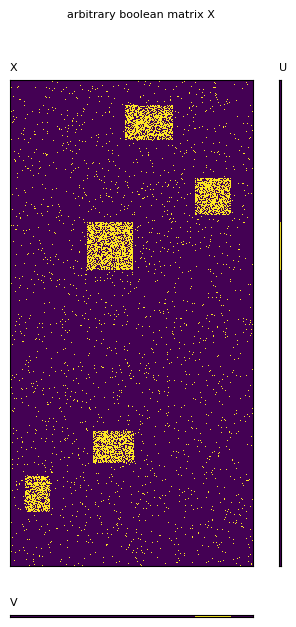

In [8]:
# generate arbitrary Boolean matrix (X)

from generators import BlockDiagonalMatrixGenerator, BlockMatrixGenerator

n_row=1000
n_col=500
k=5
overlap_flag=True
noise=[0.4, 0.02]
size_range=[0.25, 0.75, 0.25, 1.0]

X = BlockMatrixGenerator(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=1234) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
X.show_matrix(scaling=0.2, title='arbitrary boolean matrix X')

## I. Reconstruction task

In [9]:
from datasets import NoSplit

X_split = NoSplit(X=X.X)

X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

### 1. Manually select tau
k and w are not effective here.

[I] k            : 5
[I] tau          : 0.1
[I] weights      : [0.5, 0.5]
[I] display      : True
[I]   scaling    : 0.5
[W] Missing validation data.


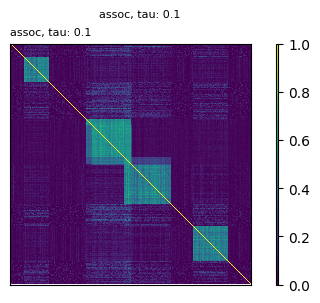

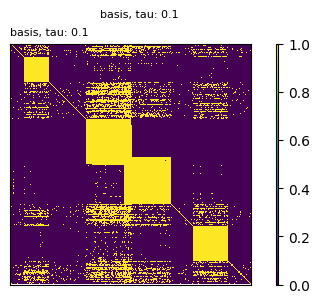

[I] k            : 5
[I] tau          : 0.2
[I] weights      : [0.5, 0.5]
[I] display      : True
[I]   scaling    : 0.5
[W] Missing validation data.


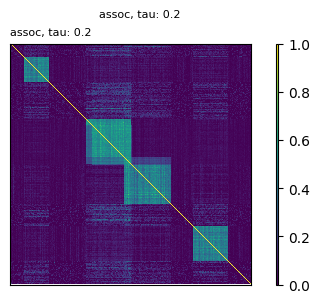

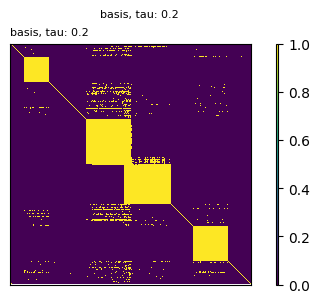

[I] k            : 5
[I] tau          : 0.3
[I] weights      : [0.5, 0.5]
[I] display      : True
[I]   scaling    : 0.5
[W] Missing validation data.


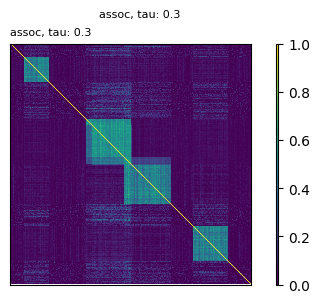

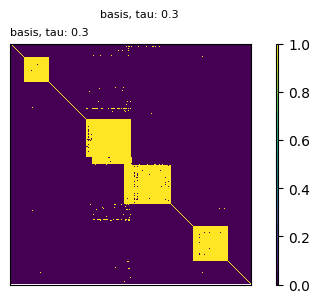

[I] k            : 5
[I] tau          : 0.4
[I] weights      : [0.5, 0.5]
[I] display      : True
[I]   scaling    : 0.5
[W] Missing validation data.


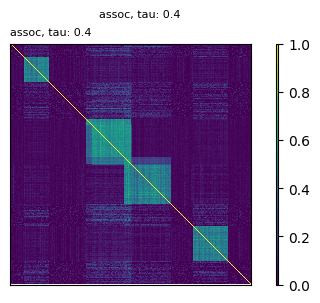

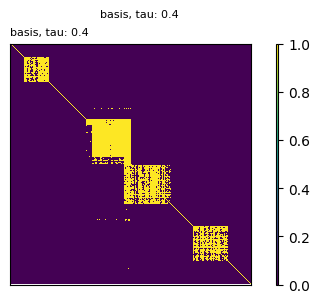

In [10]:
k = 5
tau_list = [0.10, 0.20, 0.30, 0.40]
w = [0.5, 0.5]

for tau in tau_list:
    asso = Asso(k=k, tau=tau, w=w)
    # plot assoc and basis
    asso._fit_prepare(X_train, display=True, scaling=0.5)

### 2. Grid search for w
Use some small k and selected tau for trials.

In [11]:
k = 5
tau = 0.30
w_list = [[0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]

# empty table
from utils import add_log

# metrics from sklearn is included for checking
metrics = ['Recall', 'Precision', 'Error', 'Accuracy', 'F1', 'recall_score', 'precision_score', 'accuracy_score', 'f1_score']
columns = ['time', 'k', 'tau', 'p_pos', 'p_neg'] + metrics
df_prediction = pd.DataFrame(columns=columns)
df_reconstruction = pd.DataFrame(columns=columns)

[I] k            : 5
[I] tau          : 0.3
[I] weights      : [0.4, 0.6]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 5/5 [00:24<00:00,  4.92s/it]                         


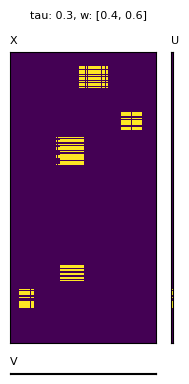

[I] task         : reconstruction


,time,k,tau,p_pos,p_neg,Recall,Precision,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
0,2023-12-21 03:32:53.144100,5,0.3,0.4,0.6,0.414874,0.64855,0.045566,0.954434,0.506038,0.414874,0.64855,0.954434,0.506038


[I] task         : prediction


,time,k,tau,p_pos,p_neg,Recall,Precision,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
0,2023-12-21 03:33:04.260410,5,0.3,0.4,0.6,0.414874,1.0,0.585126,0.414874,0.586447,0.414874,1.0,0.414874,0.586447


[I] k            : 5
[I] tau          : 0.3
[I] weights      : [0.5, 0.5]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 5/5 [00:28<00:00,  5.72s/it]                         


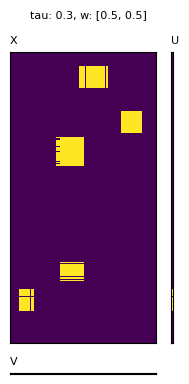

[I] task         : reconstruction


,time,k,tau,p_pos,p_neg,Recall,Precision,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
0,2023-12-21 03:32:53.144100,5,0.3,0.4,0.6,0.414874,0.648550,0.045566,0.954434,0.506038,0.414874,0.648550,0.954434,0.506038
1,2023-12-21 03:33:33.958457,5,0.3,0.5,0.5,0.640442,0.612068,0.043064,0.956936,0.625934,0.640442,0.612068,0.956936,0.625934


[I] task         : prediction


,time,k,tau,p_pos,p_neg,Recall,Precision,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
0,2023-12-21 03:33:04.260410,5,0.3,0.4,0.6,0.414874,1.0,0.585126,0.414874,0.586447,0.414874,1.0,0.414874,0.586447
1,2023-12-21 03:33:44.643009,5,0.3,0.5,0.5,0.640442,1.0,0.359558,0.640442,0.780817,0.640442,1.0,0.640442,0.780817


[I] k            : 5
[I] tau          : 0.3
[I] weights      : [0.6, 0.4]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


 60%|██████    | 3/5 [00:19<00:12,  6.41s/it]                         


KeyboardInterrupt: 

In [13]:
for w in w_list:
    asso = Asso(k=k, tau=tau, w=w)
    asso.fit(X_train, display=True, scaling=0.3)

    results = asso.eval(X_val, metrics=metrics, task='reconstruction')
    add_log(df_reconstruction, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results, verbose=True)

    # to see the difference of 'prediction' and 'reconstruction'
    # here X_val is same as X_train. it's not a good practice to use prediction in reconstruction tasks.
    # since there is no negative samples, precision will always be 1.0.
    results = asso.eval(X_val, metrics=metrics, task='prediction')
    add_log(df_prediction, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results, verbose=True)

### 3. Get k
Given tau and w.

In [ ]:
k = 10 # more than ground truth k
tau = 0.30
w = [0.75, 0.25]

asso = Asso(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, task='reconstruction') # assign X_val and task to activate per-step eval

display(asso.df_validation)

[I] k            : 10
[I] tau          : 0.3
[I] weights      : [0.75, 0.25]
[I] task         : reconstruction


100%|██████████| 10/10 [00:52<00:00,  5.23s/it]                        


,time,k,tau,p_pos,p_neg,Recall,Precsion,Accuracy,F1
0,2023-12-08 04:24:03.675511,1,0.3,0.75,0.25,0.315404,0.575506,0.948398,0.407487
1,2023-12-08 04:24:08.742658,2,0.3,0.75,0.25,0.467489,0.582632,0.951202,0.518748
2,2023-12-08 04:24:14.214632,3,0.3,0.75,0.25,0.584770,0.586584,0.953454,0.585676
3,2023-12-08 04:24:19.555170,4,0.3,0.75,0.25,0.666394,0.589169,0.955090,0.625407
4,2023-12-08 04:24:24.889271,5,0.3,0.75,0.25,0.669274,0.589491,0.955174,0.626854
5,2023-12-08 04:24:30.152316,6,0.3,0.75,0.25,0.670945,0.589431,0.955196,0.627552
6,2023-12-08 04:24:35.476917,7,0.3,0.75,0.25,0.672153,0.589867,0.955264,0.628327
7,2023-12-08 04:24:40.761179,8,0.3,0.75,0.25,0.673789,0.589793,0.955284,0.628999
8,2023-12-08 04:24:46.139872,9,0.3,0.75,0.25,0.675282,0.589760,0.955306,0.629630
9,2023-12-08 04:24:51.499591,10,0.3,0.75,0.25,0.676810,0.589649,0.955320,0.630230


### 4. Reconstruct using given k, tau, w

In [ ]:
k = 5
tau = 0.30
w = [0.75, 0.25]

asso = Asso(k=k, tau=tau, w=w)
asso.fit(X_train) # assign X_val and task to activate per-step eval

[I] k            : 5
[I] tau          : 0.3
[I] weights      : [0.75, 0.25]
[W] Missing validation data.


100%|██████████| 5/5 [00:25<00:00,  5.04s/it]                         


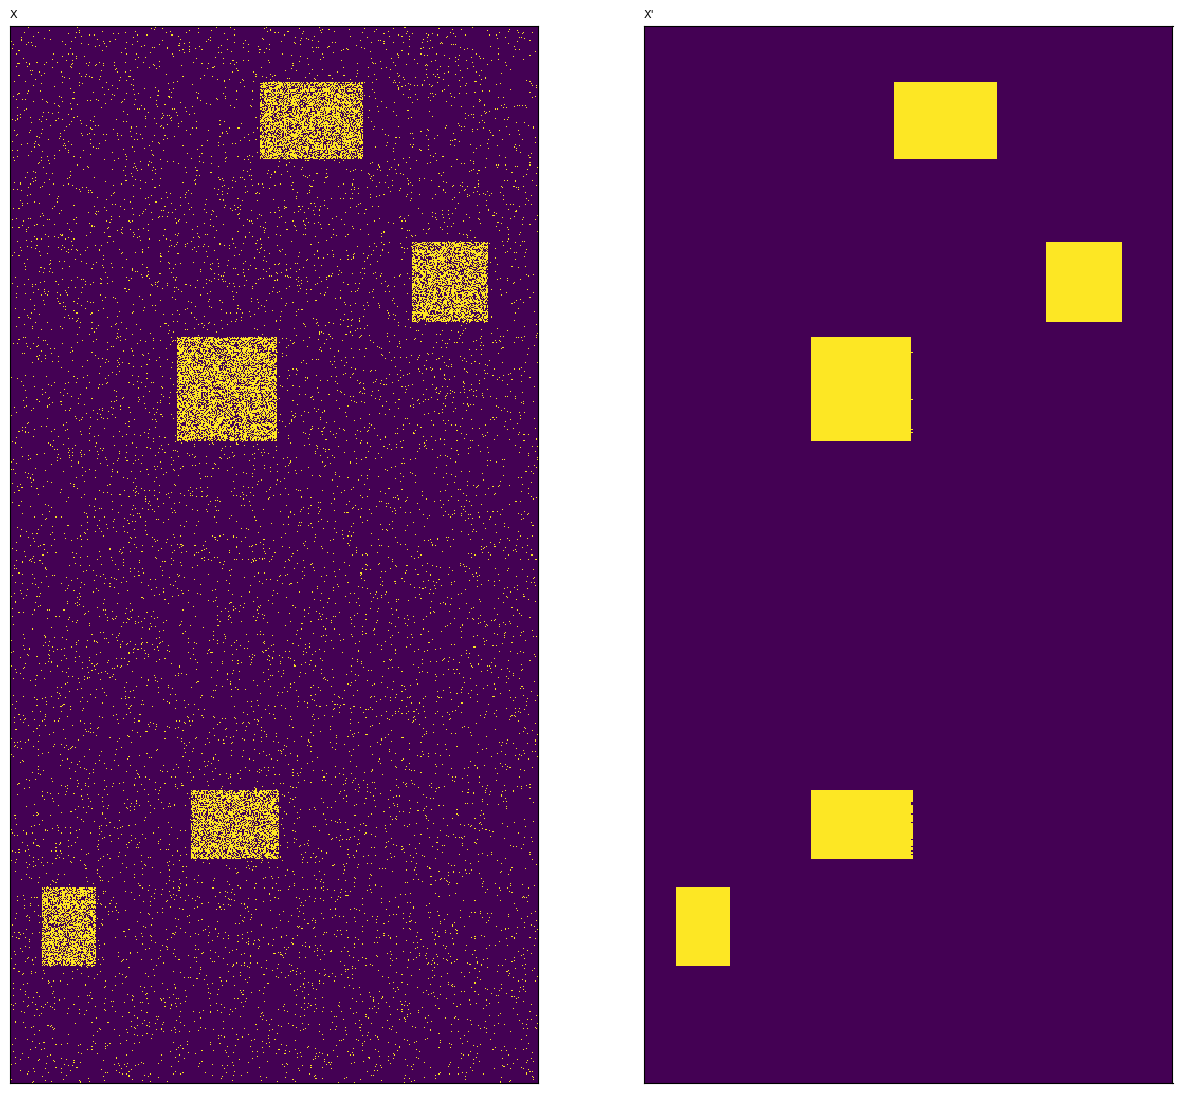

In [ ]:
from utils import matmul, to_dense, show_matrix
settings = [(to_dense(X_test), [0, 0], 'X'), 
            (matmul(asso.U, asso.V.T, sparse=False, boolean=True), [0, 1], "X'")]
show_matrix(settings=settings)